<a href="https://colab.research.google.com/github/Namratha2604/Machine_learning-project-2/blob/main/project_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Problem

**Problem Statement**: Video game sales prediction

Team Memebers:
*   Kashish
*   Lakshita
*   Kriti
*   Gunda Namratha
*   Kashvi
*   Avi







In [ ]:
#IMPORT LIBRARIES AND PAKAGES
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales (2).csv


In [ ]:
#LOAD THE DATASET
vg_df=pd.read_csv('vgsales.csv')
vg_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Understanding** **Data**

In [ ]:
def show_missing(df):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []

    for item in vg_df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })

    return output

In [ ]:
show_missing(vg_df)

,variable,dtype,count,unique,missing,pc_missing
0,Rank,int64,16598,16598,0,0.00
1,Name,object,16598,11493,0,0.00
2,Platform,object,16598,31,0,0.00
3,Year,float64,16598,40,271,1.63
4,Genre,object,16598,12,0,0.00
5,Publisher,object,16598,579,58,0.35
6,NA_Sales,float64,16598,409,0,0.00
7,EU_Sales,float64,16598,305,0,0.00
8,JP_Sales,float64,16598,244,0,0.00
9,Other_Sales,float64,16598,157,0,0.00


In [ ]:
# what does the data look like ?
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Type of Data:

1.  Rank: Categorical -Ordinal
2. Name: Categorical
3. Platform: Categorical -Nominal
4. Year: Categorical -Ordinal
5. Genre: Categorical -Nominal
6. Publisher: Categorical -Nominal
7. NA_Sales: Quantative
8. EU_Sales: Quantative
9. Japan: Quantative
10. Other_Sales: Quantative
11. Global_sales: Quantative




[6]  





In [ ]:
# How big the data is ?
vg_df.shape

(16598, 11)

In [ ]:
# what does the data look like mathematically?
vg_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


We have to standard deviation as there is a difference in mean and sd

In [ ]:
# Data type of columns
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Count of unique values in each column
vg_df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [ ]:
# Count of null values in each column
vg_df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# percentage of null value present in each column
vg_df.isnull().sum()*100/len(vg_df)

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

-will remove the rows in publisher as its percentage is very less
-can replace year with mode or we can remove too

In [ ]:
#removing the rows in publisher
vg_df=vg_df.dropna(subset=['Publisher','Year'])

In [ ]:
vg_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#b=a["Year"].mode()[0]
#a["Year"].fillna(b, inplace= True)
#vg_df['Year'] = vg_df['Year'].fillna(vg_df['Year'].mode()[0])

In [ ]:
vg_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#checking duplicated data
vg_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool

In [ ]:
#After cleaning
show_missing(vg_df)

,variable,dtype,count,unique,missing,pc_missing
0,Rank,int64,16291,16291,0,0.0
1,Name,object,16291,11325,0,0.0
2,Platform,object,16291,31,0,0.0
3,Year,float64,16291,39,0,0.0
4,Genre,object,16291,12,0,0.0
5,Publisher,object,16291,576,0,0.0
6,NA_Sales,float64,16291,408,0,0.0
7,EU_Sales,float64,16291,305,0,0.0
8,JP_Sales,float64,16291,244,0,0.0
9,Other_Sales,float64,16291,157,0,0.0


Text(0.5, 1.0, 'Most Popular Genre')

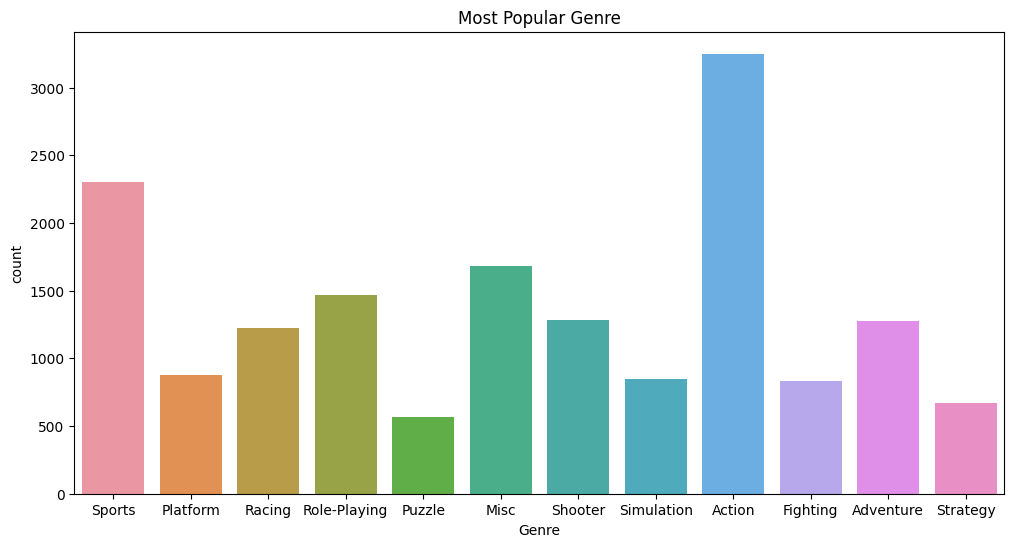

In [ ]:
#which is most popular genre
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x ='Genre', data =vg_df,ax=ax).set_title("Most Popular Genre")

Action is the most popular genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Wii'),
  Text(1, 0, 'NES'),
  Text(2, 0, 'GB'),
  Text(3, 0, 'DS'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PS3'),
  Text(6, 0, 'PS2'),
  Text(7, 0, 'SNES'),
  Text(8, 0, 'GBA'),
  Text(9, 0, '3DS'),
  Text(10, 0, 'PS4'),
  Text(11, 0, 'N64'),
  Text(12, 0, 'PS'),
  Text(13, 0, 'XB'),
  Text(14, 0, 'PC'),
  Text(15, 0, '2600'),
  Text(16, 0, 'PSP'),
  Text(17, 0, 'XOne'),
  Text(18, 0, 'GC'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'GEN'),
  Text(21, 0, 'DC'),
  Text(22, 0, 'PSV'),
  Text(23, 0, 'SAT'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'NG'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

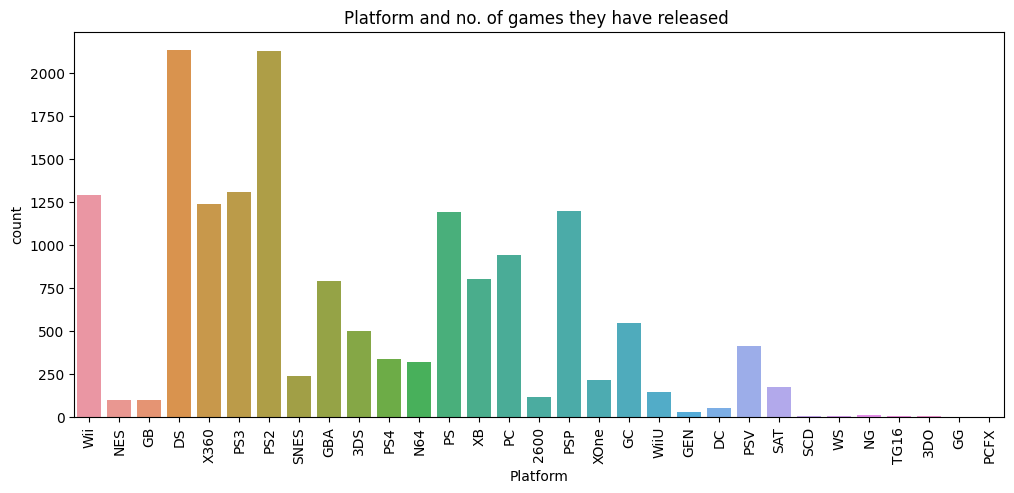

In [ ]:
# which platform releases most games
fig,ax=plt.subplots(figsize=(12,5))
sns.countplot(x ='Platform', data =vg_df,ax=ax).set_title("Platform and no. of games they have released ")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Total Revenue by Region')

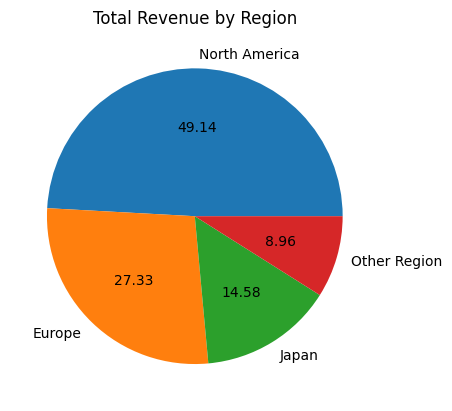

In [ ]:
pie=vg_df.iloc[:,6:10].sum()
plt.pie(pie,autopct="%.2f",labels=["North America","Europe","Japan","Other Region"])
plt.title("Total Revenue by Region")

In [ ]:
vg_df.groupby(["Year"])["Global_Sales"].sum()

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

<ipython-input-23-96306209cac8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vg_df.corr(), cmap="YlGnBu", annot = True)


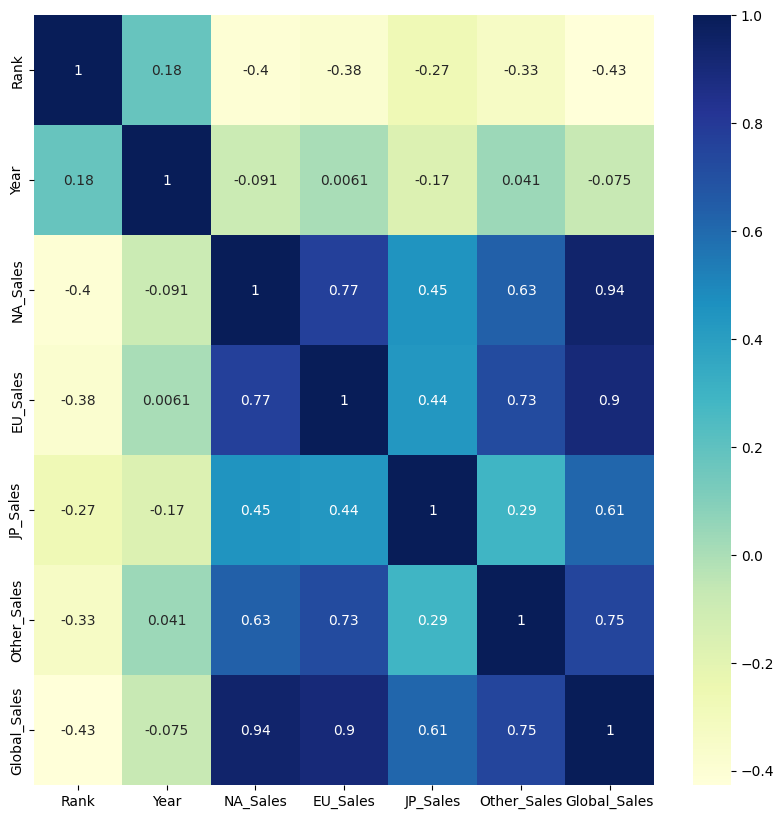

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(vg_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
#sales comparison by genre
comp_genre= vg_df[['Genre' , 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]
comp_map= comp_genre.groupby(by=['Genre']).sum()

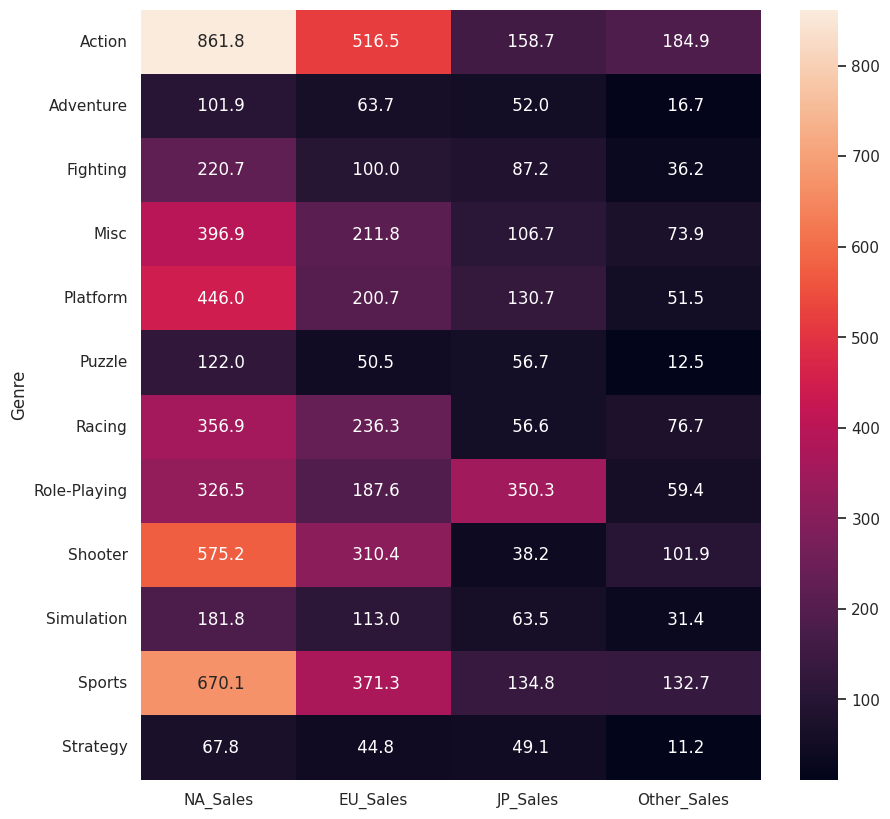

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt=' .1f')
plt.show()

In [ ]:
vg_df['NA_Sales'].skew()

18.74091281325569

In [ ]:
vg_df['EU_Sales'].skew()

18.77479616528877

In [ ]:
vg_df['JP_Sales'].skew()

11.12421357590409

In [ ]:
vg_df['Other_Sales'].skew()

24.10260949566422

In [ ]:
vg_df['Global_Sales'].skew()

17.30431167518343

In [ ]:
vg_df['NA_Sales'].kurt()

642.909262259093

In [ ]:
vg_df['EU_Sales'].kurt()

746.4313003253951

In [ ]:
vg_df['JP_Sales'].kurt()

191.20957663778285

In [ ]:
vg_df['Other_Sales'].kurt()

1011.9749446158594

In [ ]:
vg_df['Global_Sales'].kurt()

596.0045893811532

In [ ]:
data={'NA_Sales':[18.799,649.130],'EU_Sales':[18.875,756.027],'JP_Sales':[11.206,194.233],'Other_Sales':[24.233,1025.348],'Global_Sales':[17.400,603.932]}

In [ ]:
df=pd.DataFrame(data,index=['Skewness','Kurtosis'])
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Skewness,18.799,18.875,11.206,24.233,17.400
Kurtosis,649.130,756.027,194.233,1025.348,603.932


(array([1.6212e+04, 5.4000e+01, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.149,  8.298, 12.447, 16.596, 20.745, 24.894, 29.043,
        33.192, 37.341, 41.49 ]),
 <BarContainer object of 10 artists>)

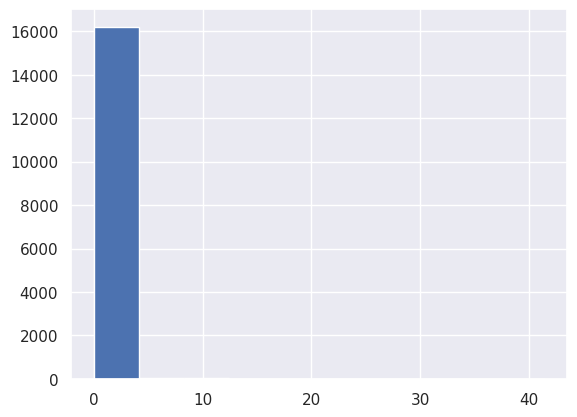

In [ ]:
plt.hist(vg_df['NA_Sales'])

(array([1.6219e+04, 5.1000e+01, 1.2000e+01, 7.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  2.902,  5.804,  8.706, 11.608, 14.51 , 17.412, 20.314,
        23.216, 26.118, 29.02 ]),
 <BarContainer object of 10 artists>)

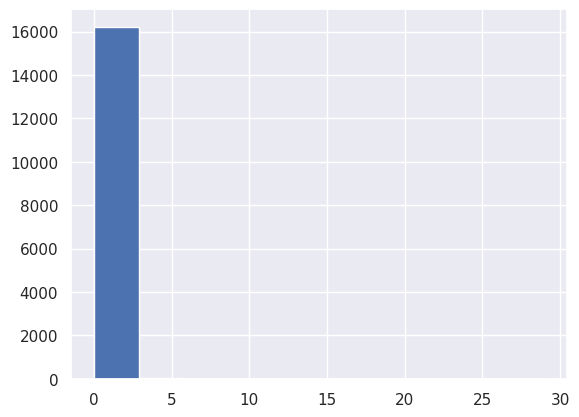

In [ ]:
plt.hist(vg_df['EU_Sales'])

(array([1.6057e+04, 1.5400e+02, 4.0000e+01, 2.0000e+01, 1.1000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.022,  2.044,  3.066,  4.088,  5.11 ,  6.132,  7.154,
         8.176,  9.198, 10.22 ]),
 <BarContainer object of 10 artists>)

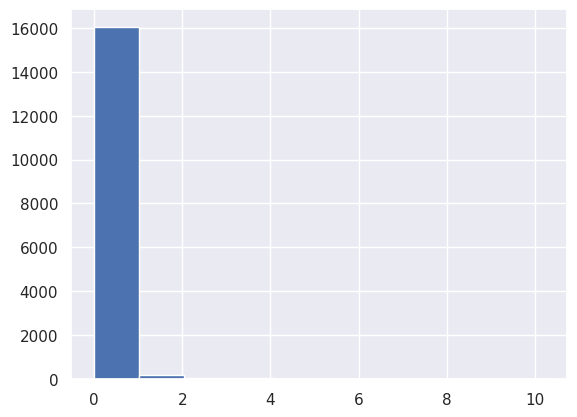

In [ ]:
plt.hist(vg_df['JP_Sales'])

(array([1.6221e+04, 5.4000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.057,  2.114,  3.171,  4.228,  5.285,  6.342,  7.399,
         8.456,  9.513, 10.57 ]),
 <BarContainer object of 10 artists>)

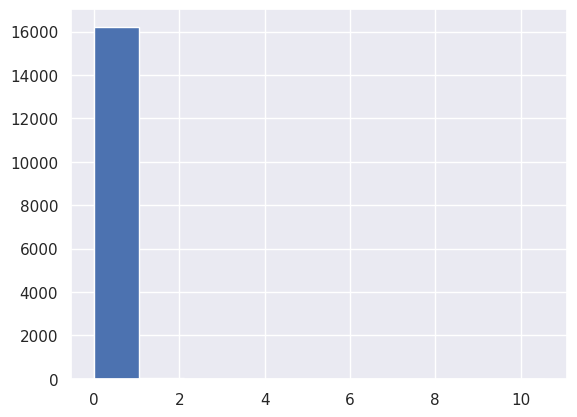

In [ ]:
plt.hist(vg_df['Other_Sales'])

(array([1.6209e+04, 5.9000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2830e+00, 1.6556e+01, 2.4829e+01, 3.3102e+01,
        4.1375e+01, 4.9648e+01, 5.7921e+01, 6.6194e+01, 7.4467e+01,
        8.2740e+01]),
 <BarContainer object of 10 artists>)

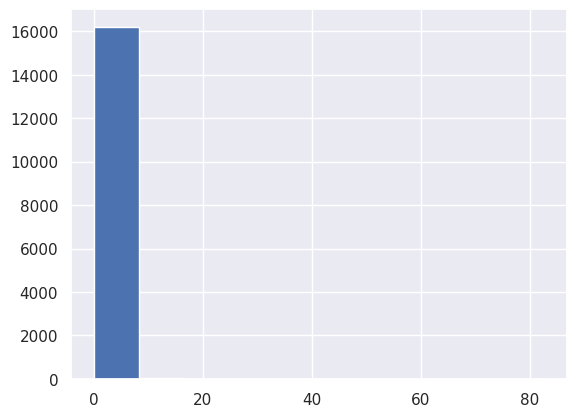

In [ ]:
plt.hist(vg_df['Global_Sales'])

[Text(0.5, 1.0, 'Genre with highest sales price globally')]

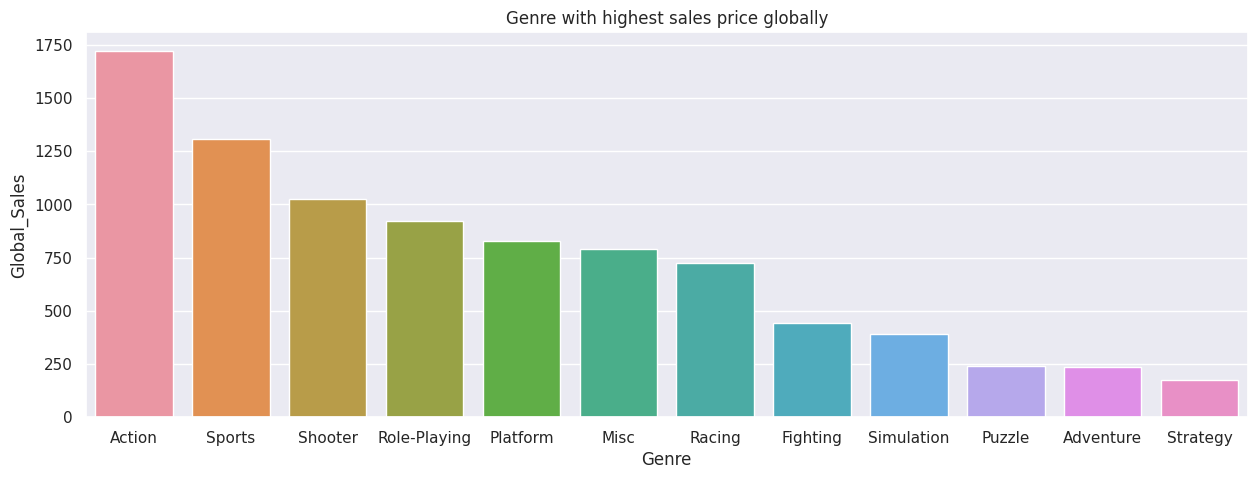

In [ ]:

genre_global=vg_df.groupby(["Genre"])["Global_Sales"].sum()
genre_global=genre_global.reset_index()
genre_global=genre_global.sort_values(by=["Global_Sales"],ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x="Genre",y="Global_Sales",data=genre_global).set(title=("Genre with highest sales price globally"))

In [ ]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [ ]:
vg_df.shape

(16291, 11)

In [ ]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vg_df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
vg_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
vg_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
vg_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

#One Hot Encoding on Platform and Publisher

In [ ]:
onehot_columns = ['Platform', 'Genre']

In [ ]:
def onehot_encode(vg_df, columns):
    for column in columns:
        dummies = pd.get_dummies(vg_df[column])
        vg_df = pd.concat([vg_df, dummies], axis=1)
        vg_df.drop(column, axis=1, inplace=True)
    return vg_df

In [ ]:
vg_df = onehot_encode(vg_df, onehot_columns)

In [ ]:
vg_df

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,2600,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,Wii Sports,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,0,...,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,2002.0,Kemco,0.01,0.00,0.00,0.00,0.01,0,...,0,0,1,0,0,0,0,0,0,0
16594,16597,Men in Black II: Alien Escape,2003.0,Infogrames,0.01,0.00,0.00,0.00,0.01,0,...,0,0,0,0,0,0,1,0,0,0
16595,16598,SCORE International Baja 1000: The Official Game,2008.0,Activision,0.00,0.00,0.00,0.00,0.01,0,...,0,0,0,0,1,0,0,0,0,0
16596,16599,Know How 2,2010.0,7G//AMES,0.00,0.01,0.00,0.00,0.01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# code for one hot encoding

#vg_df["Publisher"].nunique()
#pub_counts=vg_df["Publisher"].value_counts()

#setting limit
#threshold=180

#taking out the categories which have  value less than 180, that means these publishers have published less than 180 games
#repl=pub_counts[pub_counts<= threshold].index
#pd.get_dummies(vg_df["Publisher"].replace(repl,"Publisher<180"))

# Label Encoding on Publisher

In [ ]:
 from sklearn.preprocessing import  LabelEncoder
 le = LabelEncoder()
 vg_df["Publisher"]=le.fit_transform(vg_df["Publisher"])
 vg_df.sample()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,2600,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
2218,2220,NHL 2003,2002.0,138,0.46,0.36,0.0,0.12,0.93,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
vg_df.shape

(16291, 52)

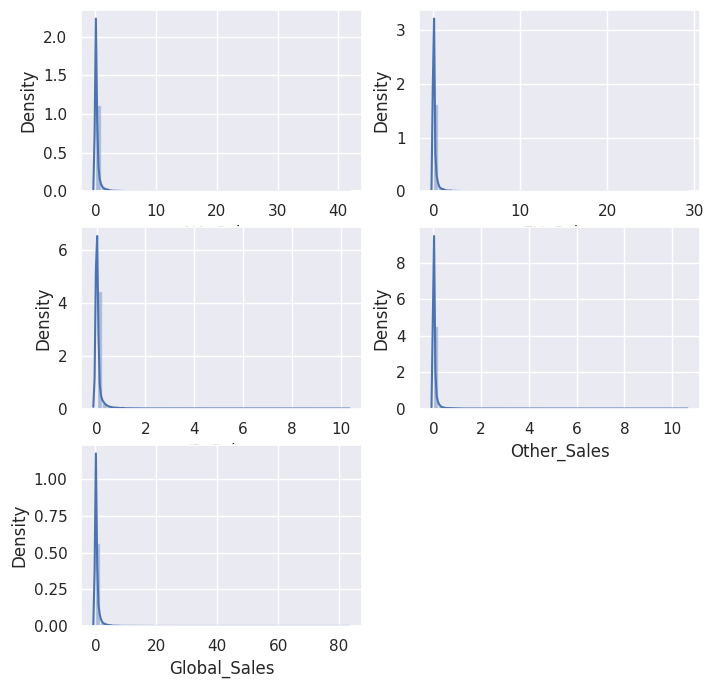

In [ ]:
import warnings
import seaborn
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
sns.distplot(vg_df['NA_Sales'])
plt.subplot(3,2,2)
sns.distplot(vg_df['EU_Sales'])
plt.subplot(3,2,3)
sns.distplot(vg_df['JP_Sales'])
plt.subplot(3,2,4)
sns.distplot(vg_df['Other_Sales'])
plt.subplot(3,2,5)
sns.distplot(vg_df['Global_Sales'])
plt.show()

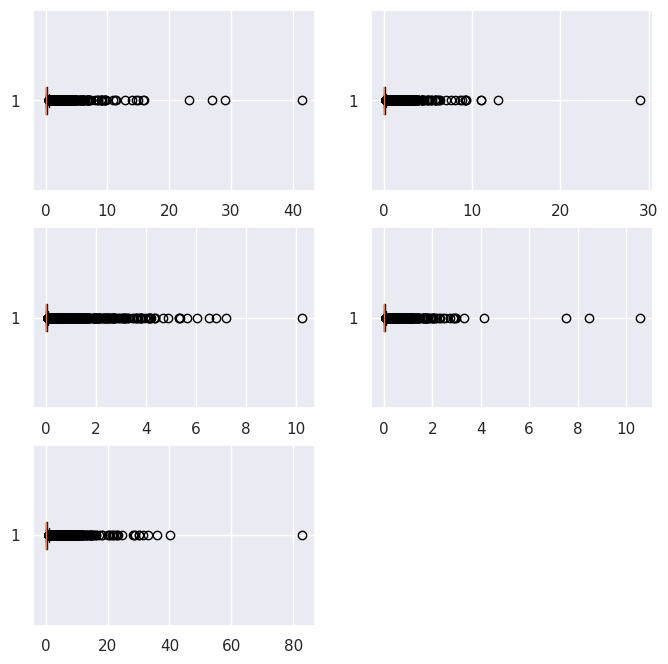

In [ ]:
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
plt.boxplot(vg_df['NA_Sales'],vert=False)
plt.subplot(3,2,2)
plt.boxplot(vg_df['EU_Sales'],vert=False)
plt.subplot(3,2,3)
plt.boxplot(vg_df['JP_Sales'],vert=False)
plt.subplot(3,2,4)
plt.boxplot(vg_df['Other_Sales'],vert=False)
plt.subplot(3,2,5)
plt.boxplot(vg_df['Global_Sales'],vert=False)
plt.show()

Outliers by Z-score

In [ ]:
'''print("Highest allowed",vg_df['NA_Sales'].mean() + 3*vg_df['NA_Sales'].std())
print("Lowest allowed",vg_df['NA_Sales'].mean() - 3*vg_df['NA_Sales'].std())

print("Highest allowed",vg_df['EU_Sales'].mean() + 3*vg_df['EU_Sales'].std())
print("Lowest allowed",vg_df['EU_Sales'].mean() - 3*vg_df['EU_Sales'].std())

print("Highest allowed",vg_df['JP_Sales'].mean() + 3*vg_df['JP_Sales'].std())
print("Lowest allowed",vg_df['JP_Sales'].mean() - 3*vg_df['JP_Sales'].std())

print("Highest allowed",vg_df['Other_Sales'].mean() + 3*vg_df['Other_Sales'].std())
print("Lowest allowed",vg_df['Other_Sales'].mean() - 3*vg_df['Other_Sales'].std())

print("Highest allowed",vg_df['Global_Sales'].mean() + 3*vg_df['Global_Sales'].std())
print("Lowest allowed",vg_df['Global_Sales'].mean() - 3*vg_df['Global_Sales'].std())'''

'print("Highest allowed",vg_df[\'NA_Sales\'].mean() + 3*vg_df[\'NA_Sales\'].std())\nprint("Lowest allowed",vg_df[\'NA_Sales\'].mean() - 3*vg_df[\'NA_Sales\'].std())\n\nprint("Highest allowed",vg_df[\'EU_Sales\'].mean() + 3*vg_df[\'EU_Sales\'].std())\nprint("Lowest allowed",vg_df[\'EU_Sales\'].mean() - 3*vg_df[\'EU_Sales\'].std())\n\nprint("Highest allowed",vg_df[\'JP_Sales\'].mean() + 3*vg_df[\'JP_Sales\'].std())\nprint("Lowest allowed",vg_df[\'JP_Sales\'].mean() - 3*vg_df[\'JP_Sales\'].std())\n\nprint("Highest allowed",vg_df[\'Other_Sales\'].mean() + 3*vg_df[\'Other_Sales\'].std())\nprint("Lowest allowed",vg_df[\'Other_Sales\'].mean() - 3*vg_df[\'Other_Sales\'].std())\n\nprint("Highest allowed",vg_df[\'Global_Sales\'].mean() + 3*vg_df[\'Global_Sales\'].std())\nprint("Lowest allowed",vg_df[\'Global_Sales\'].mean() - 3*vg_df[\'Global_Sales\'].std())'

Outliers treated by winsorization

{'whiskers': [<matplotlib.lines.Line2D at 0x7c11d2f14280>,
 'caps': [<matplotlib.lines.Line2D at 0x7c11d2f147c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c11d2eeffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c11d2f14d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c11d2f14fa0>],
 'means': []}

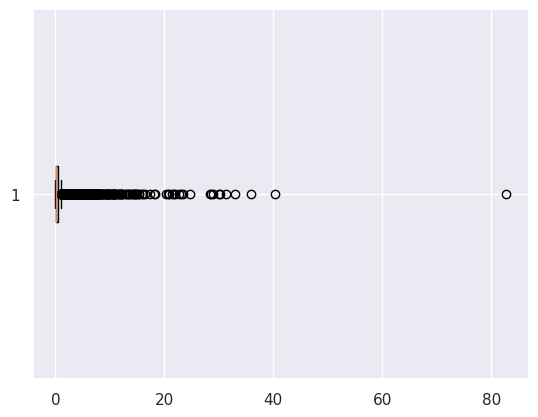

In [ ]:
total =vg_df['NA_Sales'] + vg_df['EU_Sales']+vg_df["JP_Sales"]+vg_df["Other_Sales"]
vg_df = vg_df.assign(total=total)
plt.boxplot(vg_df["total"],vert=False)

## Winsorization

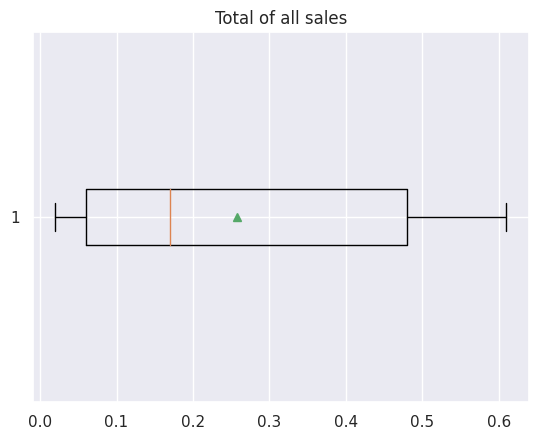

In [ ]:
from scipy.stats.mstats import winsorize
total = winsorize(vg_df["total"],(0.1,0.2))

plt.boxplot(total,vert=False,showmeans=True)
plt.title('Total of all sales')
plt.show()

# Dataframe for categorical data as input and global sales as output

In [ ]:
df_cat=vg_df.copy()


In [ ]:
df_cat.sample()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,2600,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,total
8836,8838,Earth Defense Force 2025,2013.0,109,0.06,0.04,0.05,0.01,0.15,0,...,0,0,0,0,0,1,0,0,0,0.16


In [ ]:
df_cat=df_cat.drop(['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','total','Year','Name','Rank'], axis=1)

In [ ]:
df_cat.sample()

,Publisher,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
14709,120,0.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x=df_cat.drop(columns=["Global_Sales"])
x.sample()

,Publisher,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
14234,30,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df_cat["Global_Sales"],random_state=0,test_size=0.2)

In [ ]:
#fitting MLR into training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit (x_train, y_train)

LinearRegression()

In [ ]:
#predicting the results for test set
y_pred = regressor.predict (x_test)


In [ ]:
print (y_pred)
print (y_test)

[0.60692835 0.16463602 0.27435739 ... 0.37493779 0.09205846 0.47233699]
7993     0.19
7899     0.19
14987    0.02
10496    0.10
14556    0.03
         ... 
6621     0.25
7481     0.21
8626     0.16
9779     0.12
5893     0.30
Name: Global_Sales, Length: 3259, dtype: float64


In [ ]:
from sklearn import metrics
mean_sq_err=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(mean_sq_err)
RMSE

1.3848949167229905

In [ ]:
100-RMSE

98.61510508327702

In [ ]:
df_cat

,Publisher,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,359,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,359,40.24,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,359,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,359,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,359,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,269,0.01,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
16594,241,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
16595,21,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16596,8,0.01,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
 vg_df


,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,2600,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,total
0,1,Wii Sports,2006.0,359,41.49,29.02,3.77,8.46,82.74,0,...,0,0,0,0,0,0,0,1,0,82.74
1,2,Super Mario Bros.,1985.0,359,29.08,3.58,6.81,0.77,40.24,0,...,0,1,0,0,0,0,0,0,0,40.24
2,3,Mario Kart Wii,2008.0,359,15.85,12.88,3.79,3.31,35.82,0,...,0,0,0,1,0,0,0,0,0,35.83
3,4,Wii Sports Resort,2009.0,359,15.75,11.01,3.28,2.96,33.00,0,...,0,0,0,0,0,0,0,1,0,33.00
4,5,Pokemon Red/Pokemon Blue,1996.0,359,11.27,8.89,10.22,1.00,31.37,0,...,0,0,0,0,1,0,0,0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,2002.0,269,0.01,0.00,0.00,0.00,0.01,0,...,0,1,0,0,0,0,0,0,0,0.01
16594,16597,Men in Black II: Alien Escape,2003.0,241,0.01,0.00,0.00,0.00,0.01,0,...,0,0,0,0,0,1,0,0,0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,2008.0,21,0.00,0.00,0.00,0.00,0.01,0,...,0,0,0,1,0,0,0,0,0,0.00
16596,16599,Know How 2,2010.0,8,0.00,0.01,0.00,0.00,0.01,0,...,0,0,1,0,0,0,0,0,0,0.01



# Prediction based on only numerical input and global sales as output



In [ ]:
#splitting dataset into dependent and independent variable
x_num=vg_df[["total"]]
y_num=vg_df["Global_Sales"]

In [ ]:
#spliting dataset into train and test
from sklearn.model_selection import train_test_split
x_ntrain,x_ntest,y_ntrain,y_ntest=train_test_split(x_num,y_num,random_state=0,test_size=0.2)

DECISION TREE REGRESSOR


In [ ]:
#FITTING decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_ntrain,y_ntrain)

DecisionTreeRegressor()

In [ ]:
#PREDICTING ON TEST DATA
pred_num=model.predict(x_ntest)
print(y_ntest,pred_num)

7993     0.19
7899     0.19
14987    0.02
10496    0.10
14556    0.03
         ... 
6621     0.25
7481     0.21
8626     0.16
9779     0.12
5893     0.30
Name: Global_Sales, Length: 3259, dtype: float64 [0.18029412 0.19044199 0.03091216 ... 0.161      0.11967742 0.29945652]


In [ ]:
#PREDICTING ON TRAIN DATA
y1_pred= model.predict(x_ntrain)
print(y_ntest,y1_pred)

7993     0.19
7899     0.19
14987    0.02
10496    0.10
14556    0.03
         ... 
6621     0.25
7481     0.21
8626     0.16
9779     0.12
5893     0.30
Name: Global_Sales, Length: 3259, dtype: float64 [0.01224    0.09976676 0.50036364 ... 0.11967742 0.0893578  0.74      ]


In [ ]:
#shape of train and test data of input and output variables
x_ntrain.shape,y_ntrain.shape,x_ntest.shape,y_ntest.shape

((13032, 1), (13032,), (3259, 1), (3259,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score

In [ ]:
#CALCULATING THE ERROR
mean_sq_e=metrics.mean_squared_error(y_ntest, pred_num)
rmse=np.sqrt(mean_sq_err)
100-rmse

98.61510508327702

**Linear Regression**

In [ ]:
regressor.fit(x_ntrain,y_ntrain)

LinearRegression()

In [ ]:
pred=regressor.predict(x_ntest)

In [ ]:
pred

array([0.18028634, 0.19028547, 0.03029945, ..., 0.16028809, 0.12029158,
       0.30027585])

In [ ]:
from sklearn import metrics
mean_sq_err=metrics.mean_squared_error(y_ntest,pred)

In [ ]:
RMSE=np.sqrt(mean_sq_err)

In [ ]:
RMSE

0.005305622316760521

In [ ]:
from imblearn.over_sampling import SMOTE